In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
wine = pd.read_csv('winequality-red.csv')

In [5]:
wine.shape

(1599, 12)

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


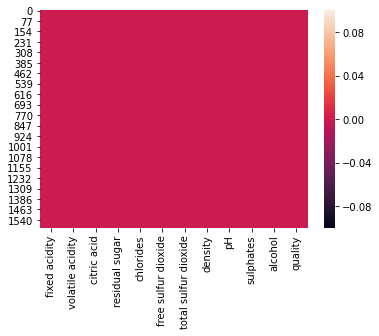

In [9]:
sns.heatmap(wine.isnull())

#No null values contained in the data

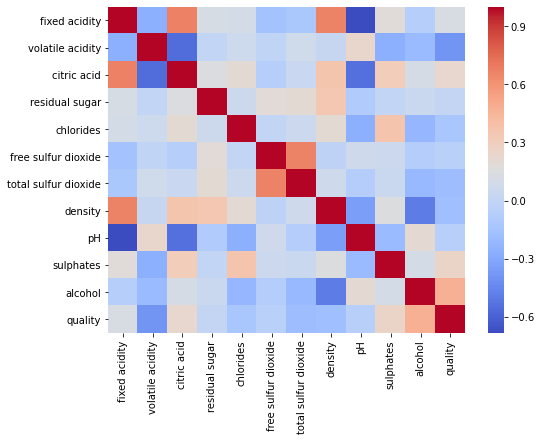

In [10]:
plt.figure(figsize=(8,6))

sns.heatmap(wine.corr(), cmap='coolwarm')

There is little or no correlation with the data contained about the red wine which includes, the acidity, the pH of the wine, the alchohol level and so on; with the quality of the red wine.

In [120]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

EDA
--

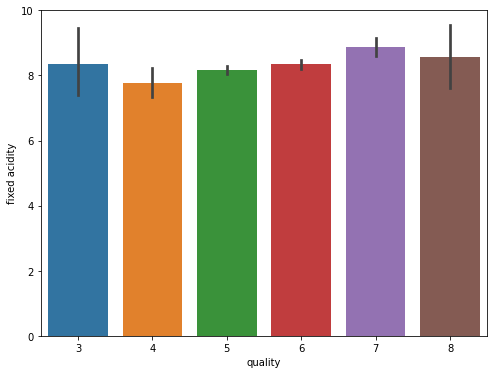

In [12]:
#There is no clear relationship between the fixed acidity of a red-wine to the quality

plt.figure(figsize=(8,6))
sns.barplot(x='quality', y='fixed acidity', data=wine)

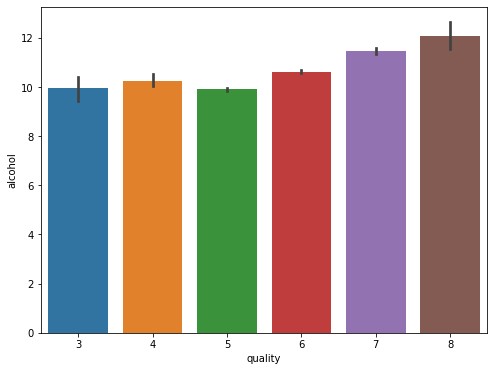

In [13]:
#This also shows no clear correlation between the alchohol level and the quality of the wine.
plt.figure(figsize=(8,6))
sns.barplot(x='quality', y='alcohol', data=wine)

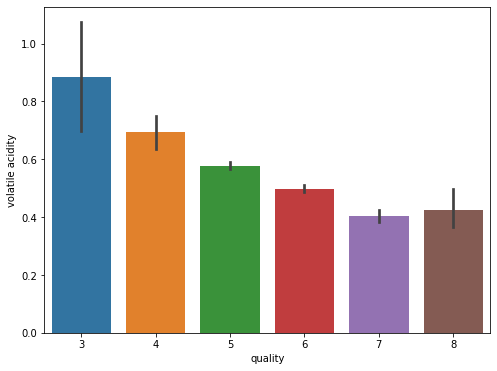

In [14]:
#here, we can see that highly rated wines tend to have less volatile acidity than the low quality ones

plt.figure(figsize=(8,6))
sns.barplot(x='quality', y='volatile acidity', data=wine)

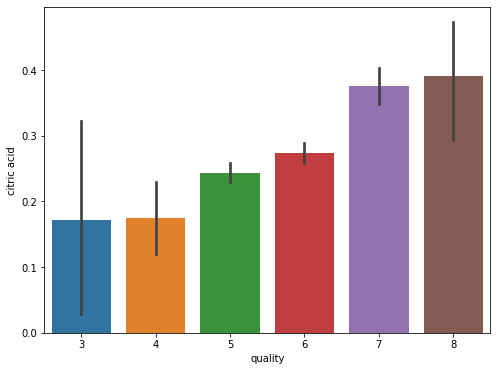

In [15]:
#The high quality wines tend to have more citric acid in them than the low quality ones

plt.figure(figsize=(8,6))
sns.barplot(x='quality', y='citric acid', data=wine)

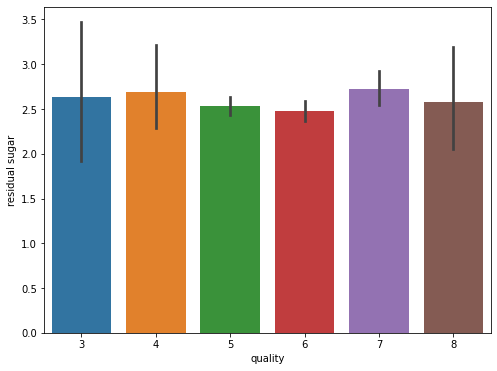

In [16]:
#no correlation between the amount of residual sugar and the wine quality

plt.figure(figsize=(8,6))
sns.barplot(x='quality', y='residual sugar', data=wine)

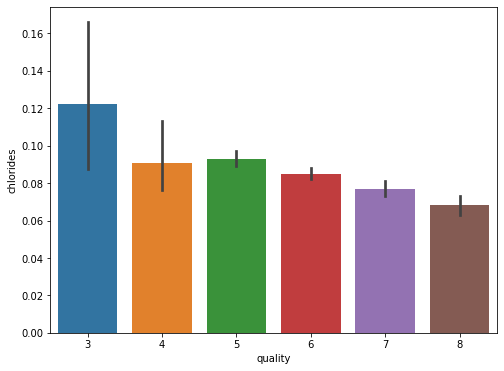

In [17]:
#Higher quality wines have less chlorides in them.

plt.figure(figsize=(8,6))
sns.barplot(x='quality', y='chlorides', data=wine)

CLASSIFICATION

* Since the quality of these wines vary from 3-8, we will do a sort of classification such that;
quality = ['good','bad']
wines with quality from 1-5 will be regarded as bad, and those with quality from 6-10 will be regarded as good

In [18]:
#For a wine to be good it should have a rating of 7 or more

def rating(quality):
    if quality < 7:
        quality = 'bad'
        return quality
    else:
        quality = 'good'
        return quality

In [19]:
wine['quality'] = wine['quality'].apply(rating)

In [20]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,bad


In [21]:
wine['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

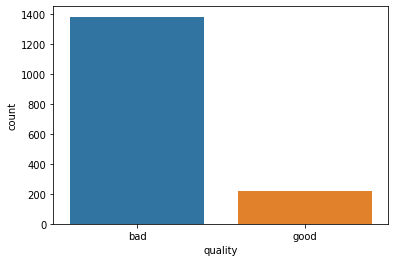

In [22]:
sns.countplot(wine['quality'])

Now we have the wine quality split into good or bad. We will now begin running our classification models and see which one works best

Scaling the Data
--

I will now scale the data such that it makes it easier for classifiers such as KNN to work with

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(wine.drop('quality', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
scaled_data = pd.DataFrame(scaler.transform(wine.drop('quality', axis=1)), columns = wine.columns[:-1])

In [27]:
scaled_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


Train_test_split
-

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = scaled_data
y = wine['quality']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

Using KNN Classifier
--

In [31]:
from sklearn.neighbors import KNeighborsClassifier

Selecting the best value of k
-
To select a best value for k, I will:
- Loop through with various k values
- Check the error rate for each
- Visualize these error rates versus each other
- Choose a k value with the lowest errors

In [37]:
#I will try k value from 1-100.

error_rate = []

for kvalue in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=kvalue)
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    error_rate.append(np.mean(prediction != y_test))

Text(0, 0.5, 'Error Rate')

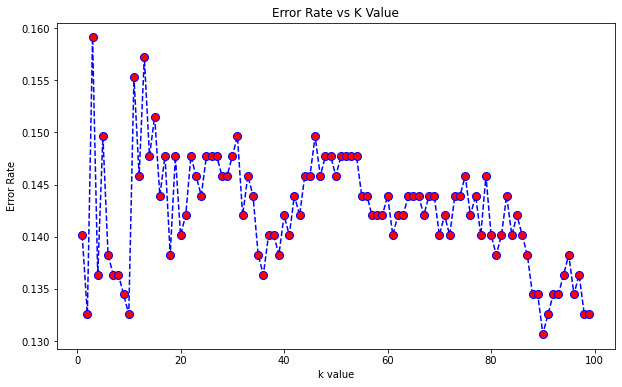

In [40]:
#Plotting out our respective error rates to visualize the least error
plt.figure(figsize=(10,6))

plt.plot(range(1,100), error_rate, color='blue', ls='--',marker='o',
        markerfacecolor='red', markersize=8)

plt.title('Error Rate vs K Value')
plt.xlabel('k value')
plt.ylabel('Error Rate')

Judging from this plot, we can see the least error when n_neighbours=90.
We will now choose it as our kvalue and print a classification report

In [49]:
knn = KNeighborsClassifier(n_neighbors=90)
knn.fit(x_train,y_train)
predictions = knn.predict(x_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(confusion_matrix(y_test, predictions))

[[446   8]
 [ 61  13]]


In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         bad       0.88      0.98      0.93       454
        good       0.62      0.18      0.27        74

    accuracy                           0.87       528
   macro avg       0.75      0.58      0.60       528
weighted avg       0.84      0.87      0.84       528



We can see an accuracy of 87% using a well evaluated KNN Classifier

Random Forest Classifier
--

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rfc = RandomForestClassifier(n_estimators=300)

In [106]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
rfc_predict = rfc.predict(x_test)

In [108]:
print(confusion_matrix(y_test,rfc_predict))

[[439  15]
 [ 41  33]]


In [109]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

         bad       0.91      0.97      0.94       454
        good       0.69      0.45      0.54        74

    accuracy                           0.89       528
   macro avg       0.80      0.71      0.74       528
weighted avg       0.88      0.89      0.88       528



The Random Forest Classifier gives an accuracy of 89% which is slightly better than that of the KNN Classifier

Using SVM
--

In [110]:
from sklearn.model_selection import GridSearchCV

In [154]:
from sklearn.svm import SVC

In [159]:
params = []
count = 0.8
while count < 1.8:
    params.append(count)
    count += 0.1

In [160]:
param_grid = {'C':params, 'gamma':params}

In [161]:
#Setting my verbose value in order to see how the Grid Search runs

grid = GridSearchCV(SVC(), param_grid, verbose=2)

In [162]:
grid.fit(x_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=0.8, gamma=0.8 ................................................
[CV] ................................. C=0.8, gamma=0.8, total=   0.1s
[CV] C=0.8, gamma=0.8 ................................................
[CV] ................................. C=0.8, gamma=0.8, total=   0.0s
[CV] C=0.8, gamma=0.8 ................................................
[CV] ................................. C=0.8, gamma=0.8, total=   0.0s
[CV] C=0.8, gamma=0.9 ................................................
[CV] ................................. C=0.8, gamma=0.9, total=   0.1s
[CV] C=0.8, gamma=0.9 ................................................
[CV] ................................. C=0.8, gamma=0.9, total=   0.1s
[CV] C=0.8, gamma=0.9 ................................................
[CV] ................................. C=0.8, gamma=0.9, total=   0.0s
[CV] C=0.8, gamma=1.0 ................................................
[CV] .........

[CV] .................. C=0.9, gamma=1.7000000000000006, total=   0.1s
[CV] C=0.9, gamma=1.7000000000000006 .................................
[CV] .................. C=0.9, gamma=1.7000000000000006, total=   0.1s
[CV] C=0.9, gamma=1.7000000000000006 .................................
[CV] .................. C=0.9, gamma=1.7000000000000006, total=   0.1s
[CV] C=1.0, gamma=0.8 ................................................
[CV] ................................. C=1.0, gamma=0.8, total=   0.0s
[CV] C=1.0, gamma=0.8 ................................................
[CV] ................................. C=1.0, gamma=0.8, total=   0.1s
[CV] C=1.0, gamma=0.8 ................................................
[CV] ................................. C=1.0, gamma=0.8, total=   0.0s
[CV] C=1.0, gamma=0.9 ................................................
[CV] ................................. C=1.0, gamma=0.9, total=   0.1s
[CV] C=1.0, gamma=0.9 ................................................
[CV] .

[CV] .................. C=1.1, gamma=1.6000000000000005, total=   0.1s
[CV] C=1.1, gamma=1.7000000000000006 .................................
[CV] .................. C=1.1, gamma=1.7000000000000006, total=   0.0s
[CV] C=1.1, gamma=1.7000000000000006 .................................
[CV] .................. C=1.1, gamma=1.7000000000000006, total=   0.1s
[CV] C=1.1, gamma=1.7000000000000006 .................................
[CV] .................. C=1.1, gamma=1.7000000000000006, total=   0.0s
[CV] C=1.2000000000000002, gamma=0.8 .................................
[CV] .................. C=1.2000000000000002, gamma=0.8, total=   0.0s
[CV] C=1.2000000000000002, gamma=0.8 .................................
[CV] .................. C=1.2000000000000002, gamma=0.8, total=   0.1s
[CV] C=1.2000000000000002, gamma=0.8 .................................
[CV] .................. C=1.2000000000000002, gamma=0.8, total=   0.1s
[CV] C=1.2000000000000002, gamma=0.9 .................................
[CV] .

[CV] ... C=1.3000000000000003, gamma=1.6000000000000005, total=   0.1s
[CV] C=1.3000000000000003, gamma=1.7000000000000006 ..................
[CV] ... C=1.3000000000000003, gamma=1.7000000000000006, total=   0.1s
[CV] C=1.3000000000000003, gamma=1.7000000000000006 ..................
[CV] ... C=1.3000000000000003, gamma=1.7000000000000006, total=   0.1s
[CV] C=1.3000000000000003, gamma=1.7000000000000006 ..................
[CV] ... C=1.3000000000000003, gamma=1.7000000000000006, total=   0.0s
[CV] C=1.4000000000000004, gamma=0.8 .................................
[CV] .................. C=1.4000000000000004, gamma=0.8, total=   0.1s
[CV] C=1.4000000000000004, gamma=0.8 .................................
[CV] .................. C=1.4000000000000004, gamma=0.8, total=   0.0s
[CV] C=1.4000000000000004, gamma=0.8 .................................
[CV] .................. C=1.4000000000000004, gamma=0.8, total=   0.1s
[CV] C=1.4000000000000004, gamma=0.9 .................................
[CV] .

[CV] ... C=1.5000000000000004, gamma=1.6000000000000005, total=   0.1s
[CV] C=1.5000000000000004, gamma=1.6000000000000005 ..................
[CV] ... C=1.5000000000000004, gamma=1.6000000000000005, total=   0.0s
[CV] C=1.5000000000000004, gamma=1.7000000000000006 ..................
[CV] ... C=1.5000000000000004, gamma=1.7000000000000006, total=   0.1s
[CV] C=1.5000000000000004, gamma=1.7000000000000006 ..................
[CV] ... C=1.5000000000000004, gamma=1.7000000000000006, total=   0.1s
[CV] C=1.5000000000000004, gamma=1.7000000000000006 ..................
[CV] ... C=1.5000000000000004, gamma=1.7000000000000006, total=   0.1s
[CV] C=1.6000000000000005, gamma=0.8 .................................
[CV] .................. C=1.6000000000000005, gamma=0.8, total=   0.1s
[CV] C=1.6000000000000005, gamma=0.8 .................................
[CV] .................. C=1.6000000000000005, gamma=0.8, total=   0.0s
[CV] C=1.6000000000000005, gamma=0.8 .................................
[CV] .

[CV] ... C=1.7000000000000006, gamma=1.6000000000000005, total=   0.1s
[CV] C=1.7000000000000006, gamma=1.6000000000000005 ..................
[CV] ... C=1.7000000000000006, gamma=1.6000000000000005, total=   0.1s
[CV] C=1.7000000000000006, gamma=1.7000000000000006 ..................
[CV] ... C=1.7000000000000006, gamma=1.7000000000000006, total=   0.1s
[CV] C=1.7000000000000006, gamma=1.7000000000000006 ..................
[CV] ... C=1.7000000000000006, gamma=1.7000000000000006, total=   0.1s
[CV] C=1.7000000000000006, gamma=1.7000000000000006 ..................
[CV] ... C=1.7000000000000006, gamma=1.7000000000000006, total=   0.1s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   18.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.8, 0.9, 1.0, 1.1, 1.2000000000000002,
                               1.3000000000000003, 1.4000000000000004,
                               1.5000000000000004, 1.6000000000000005,
                               1.7000000000000006],
                         'gamma': [0.8, 0.9, 1.0, 1.1, 1.2000000000000002,
                                   1.3000000000000003, 1.4000000000000004,
                                   1.5000000000000004, 1.6000000000000005,
                                   1.7000000000000006

In [164]:
#Choosing the best estimator

grid.best_estimator_

SVC(C=1.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [163]:
#Best parameters
grid.best_params_

{'C': 1.1, 'gamma': 1.1}

In [165]:
grid_predict = grid.predict(x_test)

In [166]:
print(confusion_matrix(y_test, grid_predict))
print('\n')
print(classification_report(y_test, grid_predict))

[[447   7]
 [ 50  24]]


              precision    recall  f1-score   support

         bad       0.90      0.98      0.94       454
        good       0.77      0.32      0.46        74

    accuracy                           0.89       528
   macro avg       0.84      0.65      0.70       528
weighted avg       0.88      0.89      0.87       528



SVM Classifier also does great with accuracy of 89%.

author: @TheAre

Date created: Mon 11th May 2020 12:30am